In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
pulse_T = 1/1e4
f_start = 0
f_stop = 1e6
samp_rate = 12e6

In [3]:
t1 = np.linspace(0, pulse_T, int(samp_rate*pulse_T))
chirp1 = scipy.signal.chirp(t1, f0 = f_start, f1 = f_stop, t1 = pulse_T, method = 'linear')

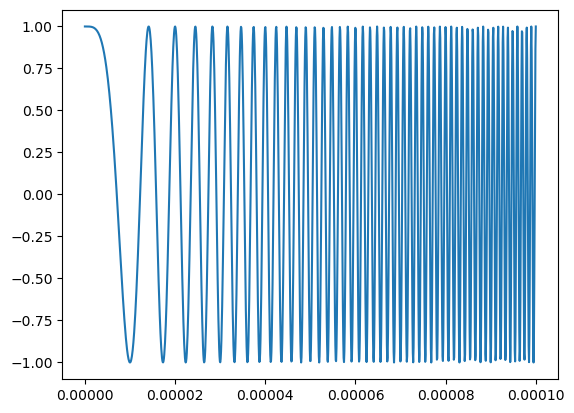

In [4]:
plt.plot(t1, chirp1)

In [5]:
f_start = 1e6
f_stop = 2e6
chirp2 = scipy.signal.chirp(t1, f0 = f_start, f1 = f_stop, t1 = pulse_T, method = 'linear')
chirp_tot = np.concatenate((chirp1, chirp2))

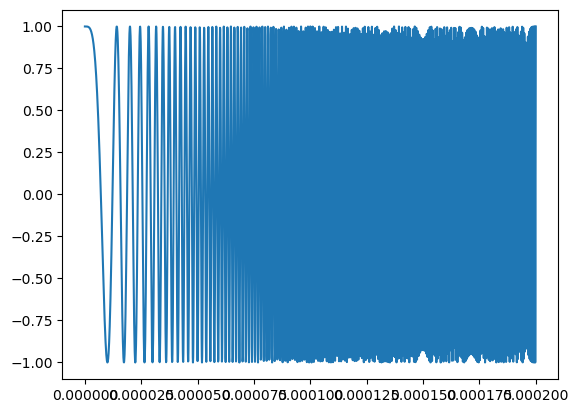

In [6]:
time = np.linspace(0, (2*pulse_T), int(2*samp_rate*pulse_T))
plt.plot(time, chirp_tot)

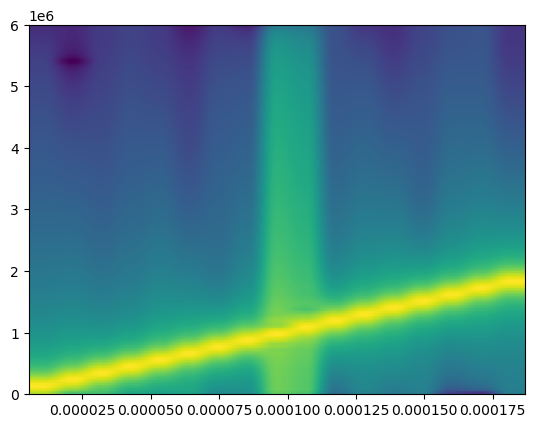

In [7]:
plt.specgram(chirp_tot, NFFT=int(1024/4), Fs=12e6)
plt.show()

In [12]:
def sfcw(B, N, start, pulse_T, samp_rate):
    
    chirp_stack = []
    t = np.linspace(0, pulse_T, int(samp_rate*pulse_T))
    
    steps = np.linspace(start, start+B, num = N+1)
    
    for i in range(len(steps)-1):
        chirp_stack.append(scipy.signal.chirp(t, f0 = steps[i], f1 = steps[i+1], t1 = pulse_T))
    
    time = np.linspace(0, (N)*pulse_T, int((N)*samp_rate*pulse_T))
    chirp_stack = np.array(chirp_stack)
    
    chirp_flat = np.ravel(chirp_stack)
    
    plt.plot(time, chirp_flat)
    plt.show()
    
    plt.specgram(chirp_flat, NFFT=int(1024/4), Fs=samp_rate)
    plt.show()
    
    plt.psd(chirp_flat, NFFT=int(1024/4), Fs=samp_rate)
    plt.show()

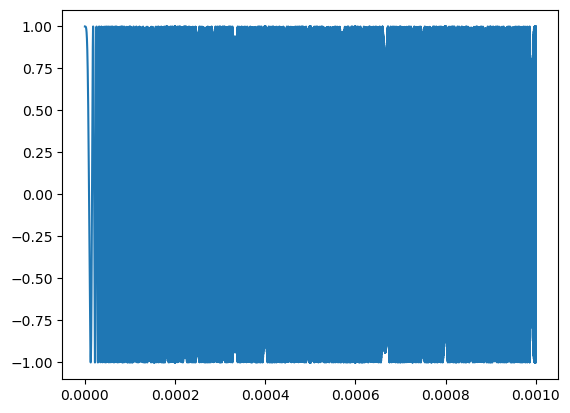

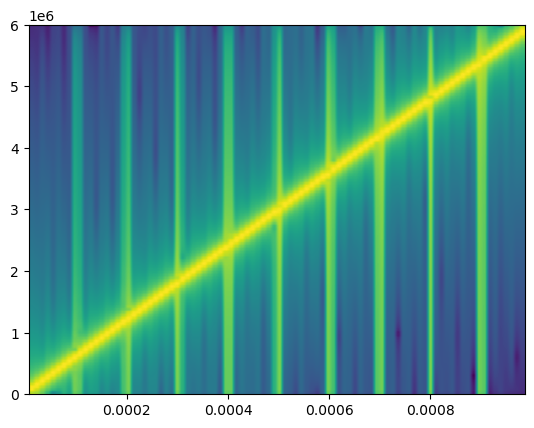

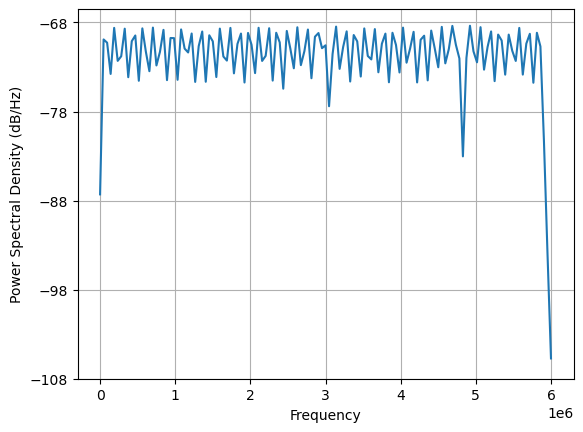

In [13]:
sfcw(6e6, 10, 0, 1/1e4, 12e6)

In [24]:
def sfcw2(B, N, start, pulse_T):
    
    samp_rate = (B+start)*2
    
    chirp_stack = []
    t = np.linspace(0, pulse_T, int(samp_rate*pulse_T))
    
    steps = np.linspace(start, start+B, num = N+1)
    
    for i in range(len(steps)-1):
        chirp_stack.append(scipy.signal.chirp(t, f0 = steps[i], f1 = steps[i+1], t1 = pulse_T))
    
    time = np.linspace(0, (N)*pulse_T, int((N)*samp_rate*pulse_T))
    chirp_stack = np.array(chirp_stack)
    
    chirp_flat = np.ravel(chirp_stack)
    
    plt.plot(time, chirp_flat)
    plt.show()
    
    plt.specgram(chirp_flat, NFFT=int(1024/4), Fs = samp_rate)
    plt.show()
    
    plt.psd(chirp_flat, NFFT=int(1024/4), Fs = samp_rate)
    plt.show()
    

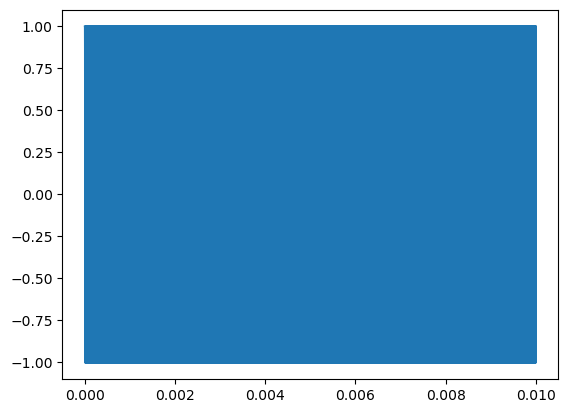

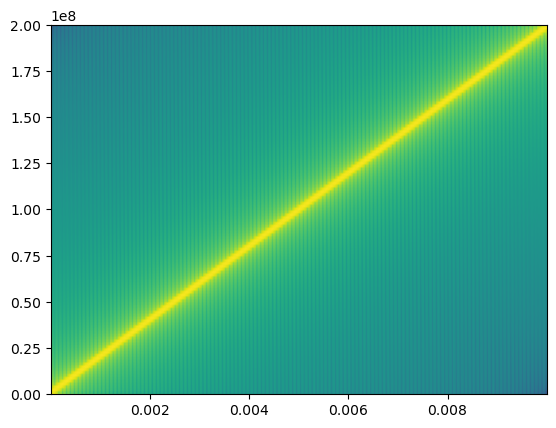

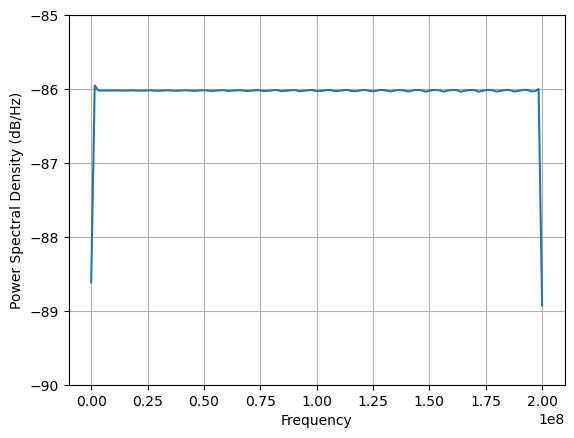

In [27]:
sfcw2(200e6, 100, 0, 1e-4)